# N-D Linear Regression

Get the data [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html)

The data represents: Test Scores for General Psychology

The data (X1, X2, X3, X4) are for each student.

* X1 = score on exam #1

* X2 = score on exam #2

* X3 = score on exam #3

* X4 = score on final exam

We will be holding X4 as our y value

## Process

* Loading the data
* Exploring the data
* Adding bias to our input 
* Solve for weights using OLS
* Compute hypothesis
* Make a Prediction
* Determine Model Performance

## Equations

The hypothesis $h_\theta(x)$ is given by the linear model

$$ h_\theta(x) = \theta^Tx = x_0\theta_0 + \theta_1 x_1$$

where x is a feature

where $\theta$ is computed using OLS

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Loading the Data

In [2]:
# pip install xlrd
df = pd.read_excel('data/mlr03.xls');

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
X = df.values
n = len(X[1]) -1
m = len(X)
print("Shape of data", X.shape)
print("Number of features", n)
print("Number of samples", m)

Shape of data (25, 4)
Number of features 3
Number of samples 25


## Exploring the data

You can use the head function to get the first 5 entries in a data frame

In [4]:
df.head()

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


### Is our data linear?

we can show a simple 2D plot for each of our features to get a general idea if our features have a linear relationship to our output

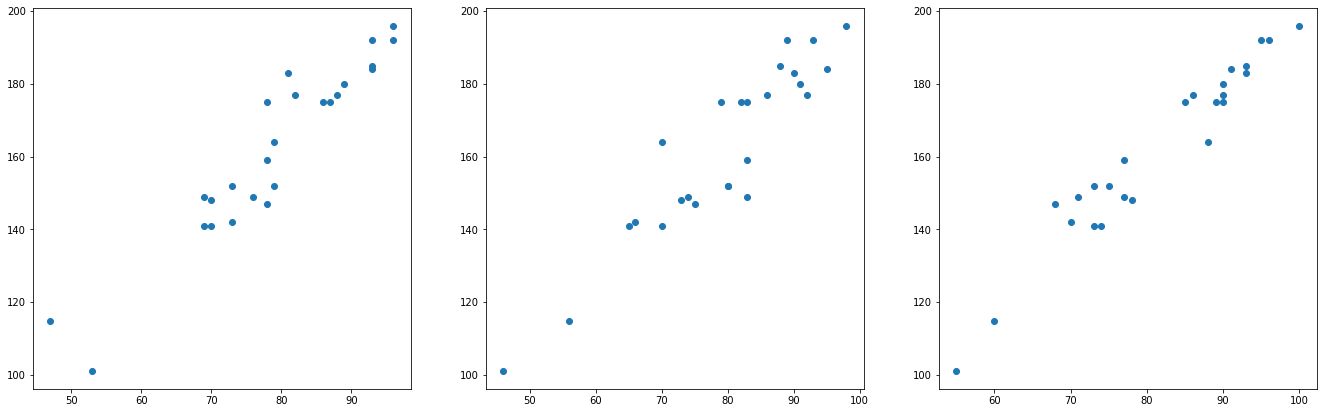

In [5]:
fig, axarr = plt.subplots(1, 3, figsize=(23, 7))

# set index to loop through plots
i = 0


for i in range(3):
    axarr[i].scatter(X[:, i], X[:, 3])

Our data seems to be pretty linear so Linear Regression seems like a good option

### Visualizing the shape of our data

X is a feature matrix that is m x n where:

* m = number of samples
* n = number of features

y is our ouput vector that is m x 1

In [6]:
# .values will transform the dataframe into a more familiar numpy array
# We can get our data into a numpy array by getting the columns by their keys
# Also we'll add our bias here as well
y = df['FINAL'].values
X = df[['EXAM1', 'EXAM2', 'EXAM3']].values

In [7]:
# Normalize Features

def normalize(X):

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return mu, sigma, X_norm

mu, sigma, X = normalize(X)
print("Normalized features", mu)
print("Standard deviation", sigma)
print("Normalized X matrix sample", X[0])

Normalized features [79.04 79.48 81.48]
Standard deviation [12.0315585  12.25110607 11.52777515]
Normalized X matrix sample [-0.5020131   0.04244515 -0.56212061]


In [8]:
# After normalizing we add our bias
X = np.concatenate([np.ones((m, 1)), X], axis=1)
print("X with bias", X[0])

X with bias [ 1.         -0.5020131   0.04244515 -0.56212061]


In [9]:
print("The shape of X is", X.shape)
print("The shape of y is", y.shape)
print("Example feature vector", X[0])

The shape of X is (25, 4)
The shape of y is (25,)
Example feature vector [ 1.         -0.5020131   0.04244515 -0.56212061]


## Solve for weights using OLS

Basically we just need to transform the following function into python code

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

The first value in $\theta$ is our $x_0$

In [10]:
theta = np.linalg.pinv(X.T@X)@X.T@y
print("Shape of theta is", theta.shape)
print("theta is", theta)

Shape of theta is (4,)
theta is [162.04         4.2824915    6.64645485  13.45803443]


## Compute hypothesis

We'll take our input vector X and pretend we dont know our output vector y

then using the weights we found we'll try and predict what y would be at any point

In [11]:
h = X@theta

In [12]:
h.shape

(25,)

## Making a prediction

now we can create our own input vector and get an estimated result

In [15]:
# exam scores 70, 90, 95
input_vec = [70, 90, 95]

mu, sigma, input_vec = normalize(input_vec)

# add a bias since all inputs must begin with 1
input_vec_bias = np.append(1, input_vec)



# make a prediction
prediction = input_vec_bias@theta

print("Input vector", input_vec)
print("Input vector with bias", input_vec_bias)
print("theta", theta)
print("Predicted Final Exam Score", prediction)

Input vector [-1.38873015  0.46291005  0.9258201 ]
Input vector with bias [ 1.         -1.38873015  0.46291005  0.9258201 ]
theta [162.04         4.2824915    6.64645485  13.45803443]
Predicted Final Exam Score 171.6292044598266


## Determine how well your model performed

We need some numerical measure to see how well our model performed

For this we can use $R^2$ (R-Squared)

We ususally use this for any regression not just Linear Regression

The definition for R-Squared is the following:

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where: 

$SS_{res}$ is the sum of squared residual 

and

$SS_{tot}$ is the sum of squared total

These are defined as:

$$SS_{res} = \sum^N_{i=1}(y_i - \hat{y_i})^2$$

<br />

$$SS_{tot} = \sum^N_{i=1}(y_i - \bar{y})^2$$

$R^2 = 1$ is a perfect model

$R^2 = 0$ is basically the average (50%)

$R^2 = -$ is worse than just computing the average

In [83]:
SSres = sum((y-h)**2)

SStot = sum((y-y.mean())**2)

R2 = 1 - SSres/SStot

print('SSres is: ', SSres)
print('SStot is:', SStot)
print('R-squared is: ', R2)

SSres is:  143.44517860350408
SStot is: 13874.960000000005
R-squared is:  0.9896615789448399


## Did adding extra features help?

Here we will check a few other combinations of X to see if they do better or worse

But this is kind of a trick question

A better R-squared does not necessarily imply a better model

If you are familiar with overfitting then you see where I'm going with this

This series of notebooks is more concerned with introducing concepts such as:

* OLS vs Gradient Descent with an emphasis on getting you familiar with the latter
* Matrix multiplication
* Data structuring
* Minimizing a cost function
* The gradient Descent Algorithm

For a good survey on common pitfalls concerning linear regression I recommend reading this [article](https://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/) 

In [16]:
X1 = df[['EXAM1']].values
X1 = np.concatenate([np.ones((m, 1)), X1], axis=1)

X2 = df[['EXAM1', 'EXAM2']].values
X2 = np.concatenate([np.ones((m, 1)), X2], axis=1)

X3 = df[['EXAM2', 'EXAM3' ]].values
X3 = np.concatenate([np.ones((m, 1)), X3], axis=1)


In [17]:
test = [X1, X2, X3]

for X in test:
    
    theta = np.linalg.pinv(X.T@X)@X.T@y
    h = X@theta
    SSres = sum((y-h)**2)
    SStot = sum((y-y.mean())**2)
    R2 = 1 - SSres/SStot
    print('R-squared is:', R2)

R-squared is: 0.8950500188020498
R-squared is: 0.9264328825615485
R-squared is: 0.9854287930443467
